# Trees and Forests

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Decision Tree Classification
==================


<IPython.core.display.Javascript object>


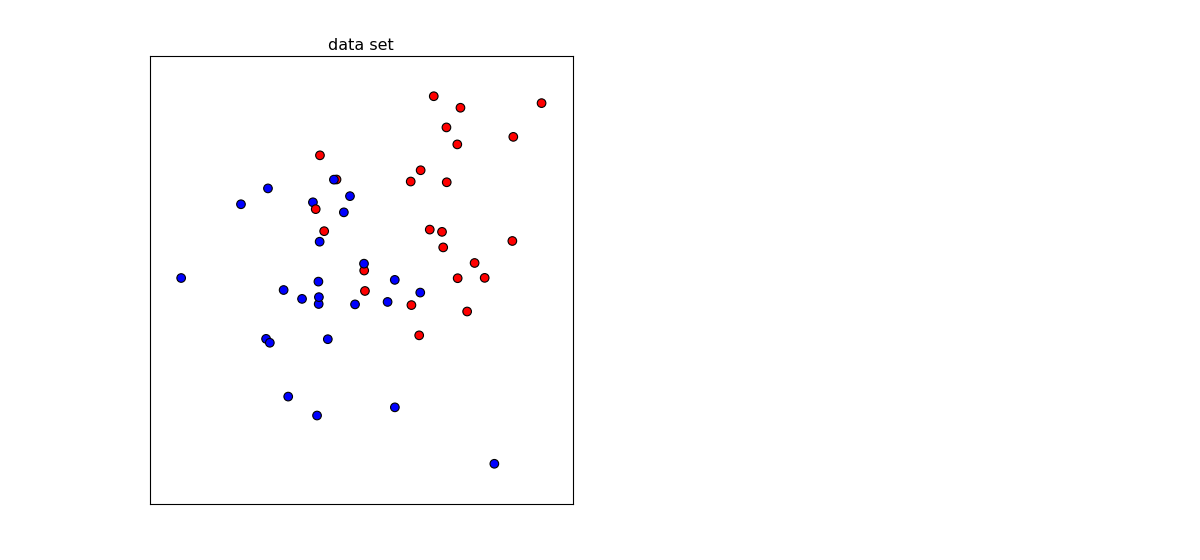

In [2]:
from plots import plot_tree_interactive
plot_tree_interactive()

## Random Forests

<IPython.core.display.Javascript object>


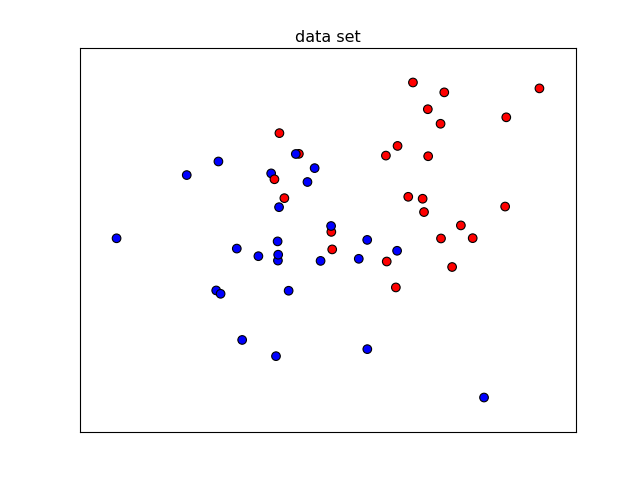

In [3]:
from plots import plot_forest_interactive
plot_forest_interactive()

## Selecting the Optimal Estimator via Cross-Validation

In [11]:
from sklearn import grid_search
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
X, y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)
parameters = {'max_features':['sqrt', 'log2'],
              'max_depth':[5, 7, 9]}

grid = grid_search.GridSearchCV(rf, parameters, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['sqrt', 'log2'], 'max_depth': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [12]:
grid.score(X_train, y_train)

0.98200641654297816

In [13]:
grid.score(X_test, y_test)

0.7093544035256647

# Exercises
Compare training and test performance of the decision tree (``sklearn.tree.DecisionTreeRegressor``) and random forest on the bike dataset.
What is the effect of changing ``max_depth`` to training and test set score?
How do the feature importances of trees and forest differ?
Use ``mglearn.tools.get_tree`` to visualize a decision tree.